# MIDTERM
## Kevin Galvan Serrano
### 014687114

# Predict loan amount based on credit history and income



1.   Logistic Regression Analysis
2.   Loan Amount
3.   Credit History, Income



In [181]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
## read in data and view a few records of the data
bob = pd.read_csv("/content/bob.csv")
bob.head()

,CustomerID,Gender,CreditHistory,Married,LoanAmount,LoanApproval,Education,Income
0,A001114,Male,1.0,No,184.0,Y,Graduate,4166
1,A001116,Male,1.0,No,110.0,Y,Not Graduate,3748
2,A001119,Male,1.0,No,80.0,N,Graduate,3600
3,A001120,Male,1.0,No,47.0,Y,Graduate,1800
4,A001123,Male,NaN,Yes,75.0,Y,Graduate,2400


In [183]:
# checking shape of data
bob.shape

(950, 8)

In [184]:
# checking datatypes
bob.dtypes

CustomerID        object
Gender            object
CreditHistory    float64
Married           object
LoanAmount       float64
LoanApproval      object
Education         object
Income             int64
dtype: object

In [185]:
# checking for null values, expecting true
bob.isnull().values.any()

True

In [186]:
# dropping null values in order to analyze highest quality of data 
bob = bob.dropna(inplace=False)

In [187]:
# checking again for null values, confirming false
bob.isnull().values.any()

False

In [204]:
bob.corr()

,CreditHistory,LoanAmount,Income
CreditHistory,1.000000,-0.013500,0.007012
LoanAmount,-0.013500,1.000000,0.502766
Income,0.007012,0.502766,1.000000


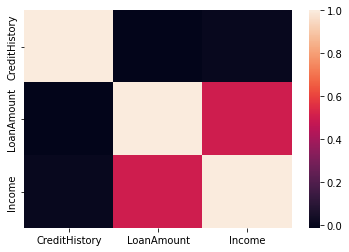

In [206]:
sns.heatmap(bob.corr())

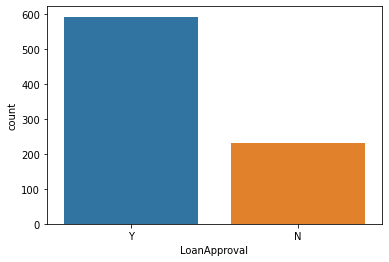

In [188]:
# analyzing using graphs
sns.countplot(x='LoanApproval', data=bob)

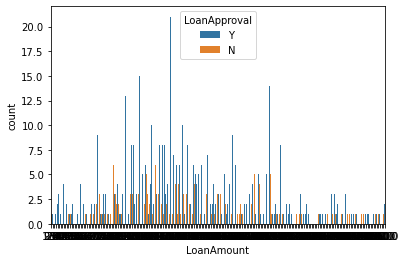

In [189]:
sns.countplot(x='LoanAmount', data=bob, hue='LoanApproval')

(array([ 65., 352., 272.,  77.,  32.,  10.,   6.,   4.,   4.,   3.]),
 array([  9. ,  68.1, 127.2, 186.3, 245.4, 304.5, 363.6, 422.7, 481.8,
        540.9, 600. ]),
 <a list of 10 Patch objects>)

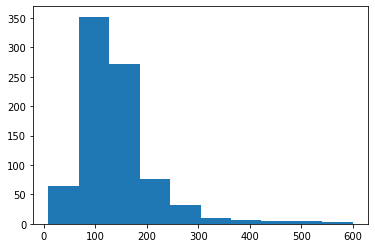

In [190]:
plt.hist(bob['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


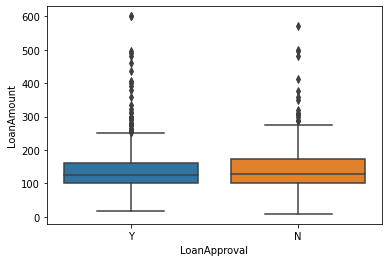

In [191]:
sns.boxplot(bob['LoanApproval'], bob['LoanAmount'])

In [192]:
# creating df for variables, removed several unecessary factors
features = ['CreditHistory', 'LoanAmount', 'Income']

In [193]:
X = bob[features]
y = bob.LoanApproval

In [194]:
# splitting dataset 25%/25% split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [195]:
# looking at the shape of training data subsets
x_train.shape, y_train.shape

((618, 3), (618,))

In [196]:
# looking at the shape of test data subsets
x_test.shape, y_test.shape

((207, 3), (207,))

In [197]:
x_train.head()

,CreditHistory,LoanAmount,Income
170,1.0,59.0,2479
623,1.0,108.0,2356
697,1.0,146.0,2333
393,0.0,105.0,6500
892,1.0,120.0,4283


In [198]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=200)

logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [207]:
# beginning prediction process
y_predict = logmodel.predict(x_test)

In [200]:
# fitting model
logreg = LogisticRegression(max_iter=1000).fit(x_train,y_train)

In [201]:
# predicting using the fitted model
y_pred=logreg.predict(x_test)

In [208]:
# generating classification report
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.85      0.48      0.61        61
           Y       0.82      0.97      0.88       146

    accuracy                           0.82       207
   macro avg       0.83      0.72      0.75       207
weighted avg       0.83      0.82      0.80       207



In [203]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[ 29  32]
 [  5 141]]


#### Accuracy = (TP + TN) / (TN+FP+FN+TP) = 170/207 = 0.82 | TN + FP = 61 | FN + TP = 146

#### Model is 82% accurate, it correctly classified 82% of its predictions concerning loan amount



#### The purpose of this analysis was to determine the predictability of loan amount based on credit history and income. Based on the information provided by the predictabilty index and the classification report, it's apparent that there's a decemt amount of correlation between credit history and income in regards to loan amount. 
